# Setup

In [1]:

from pathlib import Path
import os
import pprint
import pandas as pd
import pygwalker as pyg
import dabl

import sys
from pathlib import Path
#### For Path setup
def setup_project_path():
    """프로젝트 루트 경로를 찾아서 파이썬 경로에 추가"""
    current = Path.cwd()
    while current != current.parent:
        if (current / '.git').exists():
            if str(current) not in sys.path:
                sys.path.append(str(current))
                print(f'Project root found: {current}')
            return current
        current = current.parent
    return None

# 프로젝트 경로 설정
project_root = setup_project_path()
if project_root is None:
    # 프로젝트 루트를 찾지 못했다면 직접 지정
    project_root = Path("D:/dev/upstageailab5-ml-regression-ml_r4")
    if str(project_root) not in sys.path:
        sys.path.append(str(project_root))

#jupyter nbextension enable --py widgetsnbextension

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


Project root found: d:\dev\upstageailab5-ml-regression-ml_r4


In [2]:
from src.logger import Logger
from src.preprocessing import DataPrep
from src.eda import EDA
from src.feature import FeatureEngineer, Clustering, XAI
from src.train import Model
from src.visualization import Visualizer
from src.utils import Utils, PathManager
## memory management
import gc
gc.collect()
########################################################################################################################################
logger_instance = Logger()
logger = logger_instance.logger
utils = Utils(logger)
utils.setup_font_and_path_platform()
current_platform = utils.current_platform
#os.environ['PYTHONPATH'] = r'D:\dev\upstageailab5-ml-regression-ml_r4'
current_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
logger.info(f'#### Current workspalce: {current_path}')
if current_platform == 'Windows':
    base_path = Path(r'D:\dev\upstageailab5-ml-regression-ml_r4')
    logger.info(f'{current_platform} platform. Path: {base_path}')
elif current_platform == 'Darwin':          # Mac
    base_path = Path('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4')
    logger.info(f'{current_platform} platform. Path: {base_path}')
else:
    base_path = Path('/data/ephemeral/home/dev/upstageailab5-ml-regression-ml_r4')    # Linux
    logger.info(f'{current_platform} platform. Path: {base_path}')
########################################################################################################################################


########################################################################################################################################
### Data Prep


pm = PathManager(base_path)
pm.config




2024-11-11 17:28:22,698 - root - INFO - Initialized Logger.
2024-11-11 17:28:22,700 - root - INFO - Windows platform. Font: ['Malgun Gothic']
2024-11-11 17:28:22,704 - root - INFO - #### Current workspalce: d:\dev\upstageailab5-ml-regression-ml_r4
2024-11-11 17:28:22,705 - root - INFO - Windows platform. Path: D:\dev\upstageailab5-ml-regression-ml_r4


{'name': {'dataset_name': 'baseline',
  'split_type': 'hold_out',
  'model_name': 'random_forest'},
 'target': 'target',
 'thr_ratio_outlier': 0.01,
 'thr_ratio_null': 0.9,
 'thr_detect_categorical': '1e-7',
 'thr_null': 1000000,
 'time_delay': 3,
 'random_seed': 2024,
 'model_params': {'n_estimators': 3000, 'max_depth': 5, 'learning_rate': 0.01},
 'data_paths': {'train': 'data/train.csv', 'test': 'data/test.csv'},
 'features': ['feature1', 'feature2', 'feature3'],
 'wandb': {'project': 'project-regression_house_price',
  'entity': 'joon',
  'group': 'group-ml4'},
 'sweep_configs': {'xgboost': {'method': 'bayes',
   'metric': {'name': 'rmse', 'goal': 'minimize'},
   'parameters': {'eta': 0.3,
    'max_depth': 10,
    'subsample': 0.6239,
    'colsample_bytree': 0.5305,
    'gamma': 4.717,
    'reg_lambda': 5.081,
    'alpha': 0.4902,
    'n_estimators': 551}},
  'random_forest': {'method': 'bayes',
   'metric': {'name': 'rmse', 'goal': 'minimize'},
   'parameters': {'n_estimators': 200

## Path Config

In [3]:
# PathManager에서 경로 가져오기
data_path = pm.get_path('data', as_str=True)
prep_path = pm.get_path('processed_path', as_str=True)
output_path = pm.get_path('output', as_str=True)

# 설정 딕셔너리 생성
config = {   
    'out_path': output_path,
    'base_path': str(pm.base_path),
    'data_paths': {
        'subway_feature': str(Path(data_path) / 'subway_feature.csv'),
        'bus_feature': str(Path(data_path) / 'bus_feature.csv'),
    },
    'prep_paths': {
        'baseline': str(Path(prep_path) / 'df_base_prep.csv'),
        'auto': str(Path(prep_path) / 'df_auto_prep.csv'),
        'feat': str(Path(prep_path) / 'df_feat.csv'),
        'feat_add': str(Path(prep_path) / 'df_feat_add.csv')
    },
    'logger': logger_instance
}

# 필요한 경우 개별 경로 접근
path_baseline = config['prep_paths']['baseline']
path_auto = config['prep_paths']['auto']
path_feat = config['prep_paths']['feat']
path_feat_add = config['prep_paths']['feat_add']

config.update(pm.paths)
pprint.pprint(config)

{'base_path': 'D:\\dev\\upstageailab5-ml-regression-ml_r4',
 'config': WindowsPath('D:/dev/upstageailab5-ml-regression-ml_r4/config'),
 'data': WindowsPath('D:/dev/upstageailab5-ml-regression-ml_r4/data'),
 'data_paths': {'bus_feature': 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\bus_feature.csv',
                'subway_feature': 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\subway_feature.csv'},
 'logger': <src.logger.Logger object at 0x00000140BFC35910>,
 'logs': WindowsPath('D:/dev/upstageailab5-ml-regression-ml_r4/logs'),
 'models_path': WindowsPath('D:/dev/upstageailab5-ml-regression-ml_r4/output/models'),
 'out_path': 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\output',
 'output': WindowsPath('D:/dev/upstageailab5-ml-regression-ml_r4/output'),
 'prep_paths': {'auto': 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\preprocessed\\df_auto_prep.csv',
                'baseline': 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\preprocessed\\df_base_prep.csv',
      

In [17]:
concat = pd.read_csv(os.path.join(prep_path, 'df_baseline.csv'), index_col=0)
feat_cluster = pd.read_csv(os.path.join(prep_path, 'feat_cluster.csv'), index_col=0)
feat_transport = pd.read_csv(os.path.join(prep_path, 'feat_transport.csv'), index_col=0)

print(concat.shape, concat.columns, feat_cluster.shape, feat_cluster.columns, feat_transport.shape, feat_transport.columns)
# from src.utils import Utils
# concat =Utils.clean_df(concat)
# feat_cluster =Utils.clean_df(feat_cluster)
# feat_transport =Utils.clean_df(feat_transport)



(1038846, 48) Index(['본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호',
       '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4',
       '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '구', '동',
       '계약년', '계약월', '강남여부', '신축여부', 'is_test'],
      dtype='object') (1128094, 3) Index(['cluster_dist_transport_count', 'cluster_select',
       'cluster_select_count'],
      dtype='object') (1128094, 9) Index(['subway_direct_influence_count', 'subway_indirect_influence_count',
       'subway_shortest_distance', 'subway_zone_type',
       'bus_station_area_count', 'bus_direct_influence_count',
       'bus_indirect_influence_count', 'bus_shortest_distance',
  

In [22]:
concat

,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",k-전화번호,...,좌표Y,단지신청일,target,구,동,계약년,계약월,강남여부,신축여부,is_test
번지,,,,,,,,,,,,,,,,,,,,,
4282,1114,1,293,79.97,8,3,1987,5520,3,456,...,37.476763,240,124000.0,0,8,10,11,1,0,0
4282,1114,1,293,79.97,22,4,1987,5520,3,456,...,37.476763,240,123500.0,0,8,10,11,1,0,0
4282,1114,1,293,54.98,28,5,1987,5520,3,456,...,37.476763,240,91500.0,0,8,10,11,1,0,0
4282,1114,1,293,79.97,3,4,1987,5520,3,456,...,37.476763,240,130000.0,0,8,11,0,1,0,0
4282,1114,1,293,79.97,8,2,1987,5520,3,456,...,37.476763,240,117000.0,0,8,11,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,1288,0,3248,84.65,19,13,2014,4966,3,405,...,37.618870,69,0.0,24,172,16,6,0,1,1
5263,1288,0,3248,84.62,25,12,2014,4966,3,405,...,37.618870,69,0.0,24,172,16,6,0,1,1
5263,1288,0,3248,101.65,27,12,2014,4966,3,405,...,37.618870,69,0.0,24,172,16,7,0,1,1


In [13]:
concat = pd.read_csv(os.path.join(prep_path, 'df_baseline.csv'), index_col=0)

In [14]:
print(concat.shape, concat.columns)


(1038846, 48) Index(['본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호',
       '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4',
       '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '구', '동',
       '계약년', '계약월', '강남여부', '신축여부', 'is_test'],
      dtype='object')


In [16]:
df_profile= pd.read_csv(os.path.join(prep_path, 'df_profile.csv'), index_col=0)

In [18]:
df_profile

,type,missing_count,missing_ratio,unique_count,unique_ratio,most_common,most_common_ratio,mean,std,min,max,outlier_count,outlier_ratio
시군구,object,0,0.0,336,0.032344,서울특별시 노원구 상계동,4.308050,NaN,NaN,NaN,NaN,NaN,NaN
번지,object,0,0.0,6046,0.581992,13,0.446746,NaN,NaN,NaN,NaN,NaN,NaN
본번,object,0,0.0,1494,0.143813,30.0,0.649086,NaN,NaN,NaN,NaN,NaN,NaN
부번,object,0,0.0,321,0.030900,0.0,75.131540,NaN,NaN,NaN,NaN,NaN,NaN
아파트명,object,0,0.0,5935,0.571307,현대,1.515143,NaN,NaN,NaN,NaN,NaN,NaN
전용면적,float64,0,0.0,10637,1.023925,NaN,NaN,72.989050,2.068129e+01,12.000000,3.014700e+02,805.0,0.077490
계약년월,int64,0,0.0,201,0.019348,NaN,NaN,201475.530811,4.254330e+02,200701.000000,2.023090e+05,0.0,0.000000
계약일,int64,0,0.0,31,0.002984,NaN,NaN,15.784883,8.718408e+00,1.000000,3.100000e+01,0.0,0.000000
층,int64,0,0.0,63,0.006064,NaN,NaN,8.753750,5.748396e+00,-3.000000,6.600000e+01,11931.0,1.148486
건축년도,int64,0,0.0,60,0.005776,NaN,NaN,1998.583131,9.132471e+00,1961.000000,2.023000e+03,4393.0,0.422873


In [56]:
concat = pd.read_csv(os.path.join(prep_path, 'concat_train_test.csv'), index_col=0)

In [57]:
concat.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부', 'is_test'],
      dtype='object')

In [58]:
concat.to_csv(os.path.join(prep_path, 'concat_train_test.csv'), index=False)
feat_cluster.to_csv(os.path.join(prep_path, 'feat_cluster.csv'), index=False)
feat_transport.to_csv(os.path.join(prep_path, 'feat_transport.csv'), index=False)



In [13]:
df=pd.concat([concat, feat_cluster, feat_transport], axis=1)
df.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부', 'is_test',
       'cluster_dist_transport', 'cluster_dist_transport_count',
       'cluster_select', 'cluster_select_count', 'subway_station_area_count',
       'subway_direct_influence_count', 'subway_indirect_influence_count',
       'subway_shortest_distance', 'subway_zone_type',
       'bus_station_area_count', 'bus_direct_influence_count',
       'bus_indirect_influence_count', 'bus_shortest_distance',
       'bus_zone_

In [79]:
########################################################################################################################################
### EDA
data_prep = DataPrep(config)
list_csv = Utils.list_files(prep_path, '.csv')
#pprint.pprint(list_csv)
path_csv = list_csv[6]
print(path_csv)

df= pd.read_csv(path_csv)
df.head()
df = utils.remove_unnamed_columns(df)
df.columns

path_processed = os.path.join(config.get('processed_path'), 'df_feat_selected_preprocessed_id.csv')
df_processed = pd.read_csv(path_processed)
# df.columns = df.columns.str.replace('[-/]~', '', regex=True)
# df.columns

path_baseline = os.path.join(prep_path, 'df_baseline_prep.csv')
df_baseline = pd.read_csv(path_baseline)



2024-11-09 04:42:34,241 - root - INFO - #### Init Data Prep.. 
D:\dev\upstageailab5-ml-regression-ml_r4\data\processed\df_feat_add_cluster_dist_transport.csv
2024-11-09 04:42:41,729 - root - INFO - Removing unnamed columns: ['Unnamed: 0']


In [41]:


df_concat = pd.read_csv(os.path.join(prep_path, 'concat_train_test.csv'), index_col=0)
feat_transport = pd.read_csv(os.path.join(prep_path, 'feat_transport.csv'), index_col=0)
feat_cluster = pd.read_csv(os.path.join(prep_path, 'feat_cluster.csv'), index_col=0)

df_concat = pd.concat([df_concat, feat_transport, feat_cluster], axis=1)
df_concat.columns


Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부', 'is_test',
       'subway_station_area_count', 'subway_direct_influence_count',
       'subway_indirect_influence_count', 'subway_shortest_distance',
       'subway_zone_type', 'bus_station_area_count',
       'bus_direct_influence_count', 'bus_indirect_influence_count',
       'bus_shortest_distance', 'bus_zone_type', 'cluster_dist_transport',
       'cluster_dist_transport_count', 'cluster_select',
       'cluster_select_c

## Load Feature Engineering Data (Baseline)

In [11]:
import pickle
path_feat = os.path.join(prep_path, 'df_feat.pickle')

with open(path_feat, 'rb') as f:
    feat_eng_data = pickle.load(f)

In [12]:
dt_train = feat_eng_data.get('dt_train')
dt_test = feat_eng_data.get('dt_test')

# dt['is_test'] = 0
# dt_test['is_test'] = 1
# concat = pd.concat([dt_train, dt_test])    
#concat.value_counts('is_test')

In [13]:
concat = DataPrep.concat_train_test(dt_train, dt_test)



0    1118822
1       9272
Name: is_test, dtype: int64


In [14]:
concat.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부', 'is_test'],
      dtype='object')

In [15]:
concat.to_csv(os.path.join(prep_path, 'df_concat_train_test.csv'), index=False)


In [78]:
dt_train, dt_test = DataPrep.unconcat_train_test(concat)
print(dt_train.columns, dt_test.columns)


Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부'],
      dtype='object') Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', 

## Full concat data

In [17]:
col_id=['is_test','target']
cols_transport=['subway_station_area_count', 'subway_direct_influence_count', 'subway_indirect_influence_count', 'subway_shortest_distance', 'subway_zone_type', 'bus_station_area_count', 'bus_direct_influence_count', 'bus_indirect_influence_count', 'bus_shortest_distance', 'bus_zone_type']
cols_cluster = ['cluster_dist_transport', 'cluster_dist_transport_count'] #cluster_dist', 'cluster_dist_count',
#df_baseline.drop(columns=col_id, inplace=True)

## Column Selection

In [5]:


# cols_to_select = ['강남여부', '신축여부','건축면적', '주차대수','아파트명','전용면적','계약월','계약년','층','건축년도','도로명','k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)','k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하','경비비관리형태', '세대전기계약방법', '청소비관리형태']
# col_feat = ['subway_station_area_count', 'subway_direct_influence_count',
#        'subway_indirect_influence_count', 'subway_shortest_distance',
#        'subway_zone_type', 'bus_station_area_count',
#        'bus_direct_influence_count', 'bus_indirect_influence_count',
#        'bus_shortest_distance', 'bus_zone_type', 'cluster_dist',
#        'cluster_dist_count', 'cluster_dist_transport',
#        'cluster_dist_transport_count']
# col_to_drop = ['cluster_dist_count', 'cluster_dist']

In [28]:

# # col_feat=df.columns[50:]
# df_selected = df[cols_to_select+list(col_feat)]
# df_selected.drop(columns=col_to_drop, inplace=True)
# df_id=df[col_id]
# df_selected.columns

# df_selected = df_processed.drop(columns=col_id)
# df_selected.columns


Index(['subway_shortest_distance', '건축면적', 'k-전용면적별세대현황(60㎡이하)',
       'subway_direct_influence_count', 'bus_zone_type',
       'subway_station_area_count', 'cluster_dist_transport', 'k-시행사',
       'subway_zone_type', '건축년도', 'k-관리비부과면적', 'bus_direct_influence_count',
       'k-주거전용면적', '전용면적', '계약년', '강남여부', 'k-난방방식',
       'subway_indirect_influence_count', 'k-세대타입(분양형태)',
       'bus_station_area_count', '아파트명', '도로명', '주차대수',
       'bus_indirect_influence_count', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', '층', 'k-전체동수', 'k-건설사(시공사)', '계약월',
       'cluster_dist_transport_count', 'bus_shortest_distance', '신축여부'],
      dtype='object')

In [7]:
path_data = os.path.join(base_path, 'data')
list_csv_data = Utils.list_files(path_data, '.csv')
print(list_csv_data)

['D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\bus_feature.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\sample_submission.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\subway_feature.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\test.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\train.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\processed\\df_auto_prep.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\processed\\df_baseline_prep.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\processed\\df_feat.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\processed\\df_feat_add.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\processed\\df_feat_add_cluster.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\processed\\df_feat_add_cluster_dist.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\processed\\df_feat_add_cluster_dist_transport.csv', 'D:\\dev\\upstageailab5-ml-regression-ml_r4\\data\\p

# EDA

## Numeric processing


In [58]:
def clean_data_types(df):
    """
    데이터프레임의 데이터 타입을 정리하는 함수
    """
    df_cleaned = df.copy()
    
    for col in df_cleaned.columns:
        # 각 컬럼의 데이터 타입 확인
        if df_cleaned[col].dtypes == 'object':  # dtype이 아닌 dtypes 사용
            try:
                # 숫자로 변환 가능한지 테스트
                numeric_values = pd.to_numeric(df_cleaned[col], errors='raise')
                # 가능하다면 숫자로 변환
                df_cleaned[col] = numeric_values
                print(f"컬럼 '{col}' 숫자형으로 변환 완료")
            except ValueError:
                print(f"컬럼 '{col}' 문자형 유지")
                continue
    
    # 변환 후 데이터 타입 확인
    print("\n=== 데이터 타입 요약 ===")
    print(df_cleaned.dtypes.value_counts())
    
    return df_cleaned

# 데이터 정리
df_cleaned = clean_data_types(df_processed)


=== 데이터 타입 요약 ===
float64    34
int64       1
dtype: int64


In [60]:
df_processed.shape

(1128094, 35)

In [61]:
df_cleaned.shape
df=df_cleaned


## PygWalker

In [25]:
df_raw = pd.read_csv(os.path.join(prep_path, 'df_raw.csv'), index_col=0)
df_raw.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,0


In [8]:
df_name = 'df_feat'

html_path = os.path.join(config['report_path'],f"report_eda_pygwalker_{df_name}.html")
walker = pyg.walk(
    df_feat,
    spec=os.path.join(config['report_path'],f"eda_pygwalker_{df_name}.json"),    # this json file will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
    kernel_computation=True,          # set `kernel_computation=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
)
# 시각화를 HTML로 저장하기



Box(children=(HTML(value='\n<div id="ifr-pyg-0006269efa047ae5pUwy8nIYX96rodCW" style="height: auto">\n    <hea…

In [57]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 53 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1128094 non-null  object 
 1   번지                      1127867 non-null  object 
 2   본번                      1128019 non-null  float64
 3   부번                      1128019 non-null  float64
 4   아파트명                    1125958 non-null  object 
 5   전용면적                    1128094 non-null  float64
 6   계약년월                    1128094 non-null  int64  
 7   계약일                     1128094 non-null  int64  
 8   층                       1128094 non-null  int64  
 9   건축년도                    1128094 non-null  int64  
 10  도로명                     1128094 non-null  object 
 11  해제사유발생일                 6195 non-null     float64
 12  등기신청일자                  1128094 non-null  object 
 13  거래유형                    1128094 non-null  object 
 14  중개사소재

In [63]:
with open(html_path, 'w') as f:
    f.write(walker.to_html())


In [58]:
df_raw.describe()


,본번,부번,전용면적,계약년월,계약일,층,건축년도,해제사유발생일,단지소개기존clob,k-전체동수,...,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target,is_test
count,1.128019e+06,1.128019e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,6.195000e+03,69136.000000,250887.000000,...,251924.000000,251924.000000,251924.000000,329.0,2.518150e+05,251817.000000,251862.000000,251862.000000,1.118822e+06,1.128094e+06
mean,5.653234e+02,5.976400e+00,7.716028e+01,2.014829e+05,1.579966e+01,8.881412e+00,1.998791e+03,2.021126e+07,541.272911,14.810871,...,478.582326,478.585657,167.784911,70.0,1.904915e+05,1068.300798,126.995315,37.545760,5.799153e+04,8.219173e-03
std,5.167611e+02,4.674920e+01,2.936448e+01,4.237691e+02,8.722162e+00,5.989302e+00,9.358540e+00,1.105703e+04,751.682988,17.682771,...,758.970556,731.168009,249.626494,0.0,1.735029e+06,1247.315587,0.091001,0.052457,4.642602e+04,9.028635e-02
min,0.000000e+00,0.000000e+00,1.002000e+01,2.007010e+05,1.000000e+00,-4.000000e+00,1.961000e+03,2.020022e+07,1.000000,1.000000,...,0.000000,0.000000,0.000000,70.0,0.000000e+00,0.000000,126.798318,37.447843,3.500000e+02,0.000000e+00
25%,1.770000e+02,0.000000e+00,5.965000e+01,2.011110e+05,8.000000e+00,4.000000e+00,1.992000e+03,2.020083e+07,4.000000,5.000000,...,48.000000,95.000000,0.000000,70.0,0.000000e+00,316.000000,126.913157,37.498830,3.050000e+04,0.000000e+00
50%,4.710000e+02,0.000000e+00,8.187000e+01,2.015080e+05,1.600000e+01,8.000000e+00,2.000000e+03,2.021032e+07,159.000000,10.000000,...,226.000000,258.000000,64.000000,70.0,1.735000e+03,683.000000,127.014971,37.544936,4.480000e+04,0.000000e+00
75%,7.810000e+02,1.000000e+00,8.496000e+01,2.018050e+05,2.300000e+01,1.200000e+01,2.005000e+03,2.022050e+07,725.000000,17.000000,...,576.000000,582.000000,237.000000,70.0,8.414210e+03,1284.000000,127.059590,37.577117,6.980000e+04,0.000000e+00
max,4.974000e+03,2.837000e+03,4.243200e+02,2.023090e+05,3.100000e+01,6.900000e+01,2.023000e+03,2.023093e+07,2888.000000,124.000000,...,4975.000000,5132.000000,1500.000000,70.0,3.159620e+07,12096.000000,127.179998,37.687725,1.450000e+06,1.000000e+00


In [59]:
df_train = df_raw.loc[df_raw['is_test'] == 1]

df_train['target'].isnull().sum()





9272

In [43]:
target_col='좌표X'
df_raw[df_raw[target_col].isnull()]



,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test
975,서울특별시 강남구 개포동,189,189.0,0.0,개포주공4단지,50.39,201801,25,1,1982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134000.0,0
976,서울특별시 강남구 개포동,189,189.0,0.0,개포주공4단지,50.39,201801,25,4,1982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158000.0,0
977,서울특별시 강남구 개포동,189,189.0,0.0,개포주공4단지,50.39,201801,25,1,1982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155000.0,0
978,서울특별시 강남구 개포동,189,189.0,0.0,개포주공4단지,42.55,201801,26,4,1982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132000.0,0
979,서울특별시 강남구 개포동,189,189.0,0.0,개포주공4단지,50.39,201802,10,1,1982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.76,202307,15,12,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9254,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.76,202307,26,15,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9255,서울특별시 중랑구 중화동,450,450.0,0.0,한신,50.37,202308,4,9,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9256,서울특별시 중랑구 중화동,450,450.0,0.0,한신,59.76,202308,23,2,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [44]:
target_col='target'
df_raw[target_col].isnull().sum()



9272

In [39]:
len(df_train['해제사유발생일'])




1118822

In [40]:
1118822 -1112839

5983

In [64]:

html_str = pyg.to_html(df)
with open(html_path, 'w') as f:
    f.write(html_str)

In [21]:
# # !pip install pygwalker

# df_name = 'df_feat_selected_preprocessed'
# html_path = os.path.join(config['report_path'],f"report_eda_pygwalker_{df_name}.html")
# gwalker = pyg.walk(df_selected, return_html=True)
df.describe()


,본번,부번,전용면적,계약년월,계약일,층,건축년도,k-전체동수,k-전체세대수,k-연면적,...,subway_zone_type,bus_station_area_count,bus_direct_influence_count,bus_indirect_influence_count,bus_shortest_distance,bus_zone_type,cluster_dist_transport,cluster_dist_transport_count,is_test,target
count,1.128019e+06,1.128019e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,...,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06
mean,5.653234e+02,5.976400e+00,7.716028e+01,2.014829e+05,1.579966e+01,8.881412e+00,1.998791e+03,1.060994e+01,8.820438e+02,1.194089e+05,...,-3.716685e-16,-1.252870e-15,2.206883e-15,2.083682e-15,-2.281610e-15,-1.024910e-16,4.297166e-16,-2.246388e-15,8.219173e-03,5.751489e+04
std,5.167611e+02,4.674920e+01,2.936448e+01,4.237691e+02,8.722162e+00,5.989302e+00,9.358540e+00,1.397597e+01,9.864624e+02,1.427995e+05,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.028635e-02,4.653036e+04
min,0.000000e+00,0.000000e+00,1.002000e+01,2.007010e+05,1.000000e+00,-4.000000e+00,1.961000e+03,1.000000e+00,5.900000e+01,0.000000e+00,...,-2.623050e+00,-1.901191e+00,-3.291555e+00,-3.098350e+00,-4.882642e+00,-3.128874e-01,-2.265198e+00,-4.093856e+00,0.000000e+00,0.000000e+00
25%,1.770000e+02,0.000000e+00,5.965000e+01,2.011110e+05,8.000000e+00,4.000000e+00,1.992000e+03,3.280629e+00,2.882427e+02,4.117400e+04,...,-4.477037e-01,-4.843279e-01,-6.569186e-01,-7.125884e-01,-6.140049e-01,-3.128874e-01,-7.159372e-01,-7.219438e-01,0.000000e+00,3.000000e+04
50%,4.710000e+02,0.000000e+00,8.187000e+01,2.015080e+05,1.600000e+01,8.000000e+00,2.000000e+03,6.275765e+00,5.180000e+02,7.136500e+04,...,-4.477037e-01,1.380923e-01,1.666451e-02,-2.608610e-02,5.562454e-03,-3.128874e-01,2.636594e-02,-1.590953e-03,0.000000e+00,4.450000e+04
75%,7.810000e+02,1.000000e+00,8.496000e+01,2.018050e+05,2.300000e+01,1.200000e+01,2.005000e+03,1.205642e+01,9.980000e+02,1.390690e+05,...,1.183940e+00,6.578332e-01,6.281924e-01,7.580091e-01,6.061873e-01,-3.128874e-01,8.581787e-01,6.698232e-01,0.000000e+00,6.950000e+04
max,4.974000e+03,2.837000e+03,4.243200e+02,2.023090e+05,3.100000e+01,6.900000e+01,2.023000e+03,1.240000e+02,9.510000e+03,9.591851e+06,...,1.183940e+00,3.833186e+00,4.054855e+00,2.438959e+00,5.736422e+00,3.196093e+00,2.047940e+00,2.555496e+00,1.000000e+00,1.450000e+06


In [46]:
df.shape

(1128094, 65)

## ydata profiling

In [65]:
from ydata_profiling import ProfileReport

# 방법 1: 설정 딕셔너리 사용
profile_config = {
    "title": "yData Profiling Report: House Price Prediction",
    "dataset": {
        "description": "House Price Prediction",
        "copyright_holder": "CC0: Public Domain",
        "url": ""
    },
    "correlations": {
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False}
    },
    "explorative": True,
    "plot": {
        "wordcloud": {
            "enabled": True,
            "max_words": 100
        }
    }
}

profile = ProfileReport(df, **profile_config)

# ydata profiling 실행
# # 결과 출력
# profile.to_widgets() # ~15 minutes

# profile.to_notebook_iframe()

In [66]:
html_path = os.path.join(config['report_path'], f"report_ydata_profiling_eda_{df_name}.html")
profile.to_file(html_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
df.columns
['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-홈페이지', 'k-등록일자']

Index(['Unnamed: 0', '번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도',
       '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-홈페이지', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부',
       'is_test', 'subway_station_area_count', 'subway_direct_influence_count',
       'subway_indirect_influence_count', 'subway_shortest_distance',
       'subway_zone_type', 'bus_station_area_count',
       'bus_direct_influence_count', 'bus_indirect_influence_count',
       'bus_shortest_distance', 'bus_zone_type', 'cluster_dist_transport',
       'cluster_dist_transport_count', 'is_test', 'target'],
      

## DataPrep

In [67]:
from dataprep.eda import create_report
from dataprep.eda import plot

def convert_column_types(df):
    # 정수형으로 변환할 컬럼들
    int_columns = ['강남여부', '신축여부']
    
    for col in int_columns:
        if col in df.columns:
            # NA 값을 0으로 채우고 정수형으로 변환
            df[col] = df[col].fillna(0).astype('int32')
    
    return df

# 데이터프레임에 적용
df_converted = convert_column_types(df)
print(df_converted[['강남여부']].dtypes)
# EDA 보고서 생성
report = create_report(df_converted)
html_path = os.path.join(config['report_path'],f"report_dataprep_eda_{df_name}.html")
# HTML 파일로 리포트를 저장
report.save(html_path)
# report.show_browser()

# # 특정 컬럼에 대한 상세 분석
# plot(df, "column_name")
# # 두 변수 간의 관계 분석
# plot(df, "column1", "column2")

# # # 결측값 처리
# # from dataprep.clean import clean_missing
# # from dataprep.clean import clean_outliers
# # df_cleaned = clean_missing(df, missing_num='mean', missing_cat='mode')
# # df_no_outliers = clean_outliers(df, method='zscore')

강남여부    int32
dtype: object


100%|##########| 3/3 [00:00<?, ?it/s]

100%|##########| 3/3 [00:00<?, ?it/s]

100%|##########| 3/3 [00:00<?, ?it/s]

100%|##########| 3/3 [00:00<?, ?it/s]

100%|##########| 3/3 [00:00<?, ?it/s]

100%|##########| 3/3 [00:00<?, ?it/s]

  0%|          | 0/9493 [00:00<?, ?it/s]

Report has been saved to D:\dev\upstageailab5-ml-regression-ml_r4\output\report\report_dataprep_eda_df_baseline_cleaned.html!


In [26]:
df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-홈페이지', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'subway_station_area_count',
       'subway_direct_influence_count', 'subway_indirect_influence_count',
       'subway_shortest_distance', 'subway_zone_type',
       'bus_station_area_count', 'bus_direct_influence_count',
       'bus_indirect_influence_count', 'bus_shortest_distance',
       'bus_zone_type', 'cluster_dist_transport',
       'cluster_dist_transport_count', 'is_test', 'target'],
      dtype='object')

## Sweetviz

In [68]:
import sweetviz as sv
# 데이터 로드
# df = pd.read_csv('your_dataset.csv')
html_path = os.path.join(config['report_path'],f"report_sweetviz_eda_{df_name}.html")
# 단일 데이터셋 분석
report = sv.analyze(df)
report.show_html(html_path)

# # 두 데이터셋 비교 (예: 훈련셋과 테스트셋)
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')
# compare_report = sv.compare([train_df, "Train"], [test_df, "Test"])
# compare_report.show_html('comparison_report.html')

# # 타겟 변수 지정 및 특정 설정 적용
# report_with_target = sv.analyze(df, target_feat='target_column', 
#                                 feat_cfg=sv.FeatureConfig(skip=['column_to_skip'], 
#                                                          force_text=['column_as_text']))
# report_with_target.show_html('report_with_target.html')

                                             |          | [  0%]   00:00 -> (? left)

Report D:\dev\upstageailab5-ml-regression-ml_r4\output\report\report_sweetviz_eda_df_baseline_cleaned.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Re-DataPrep after EDA

In [60]:
# concat = pd.read_csv(os.path.join(prep_path, 'concat_train_test.csv'), index_col=0)

Analyzing data distributions...

Skewness Analysis:
건축면적                      16.143615
k-연면적                      5.515308
k-전체동수                     4.384373
k-전용면적별세대현황(60㎡~85㎡이하)     4.358334
k-전용면적별세대현황(60㎡이하)         4.102860
주차대수                       3.172313
k-주거전용면적                   3.132270
k-관리비부과면적                  3.052206
k-85㎡~135㎡이하               2.716200
k-전체세대수                    2.692889
신축여부                       2.158182
전용면적                       1.252131
층                          1.149168
강남여부                       0.543761
좌표Y                        0.481409
계약일                        0.002171
좌표X                       -0.240098
건축년도                      -0.343281
dtype: float64

Applying feature scaling...

Analyzing feature correlations...


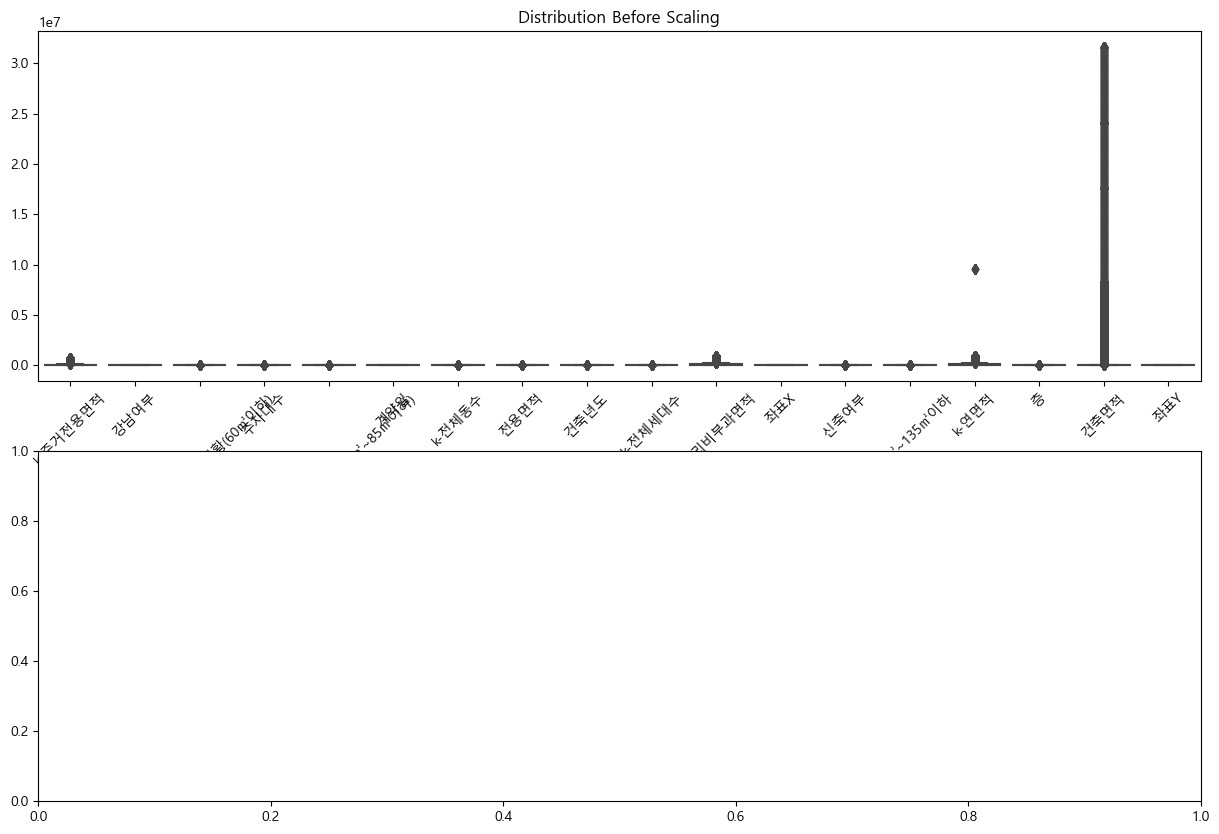

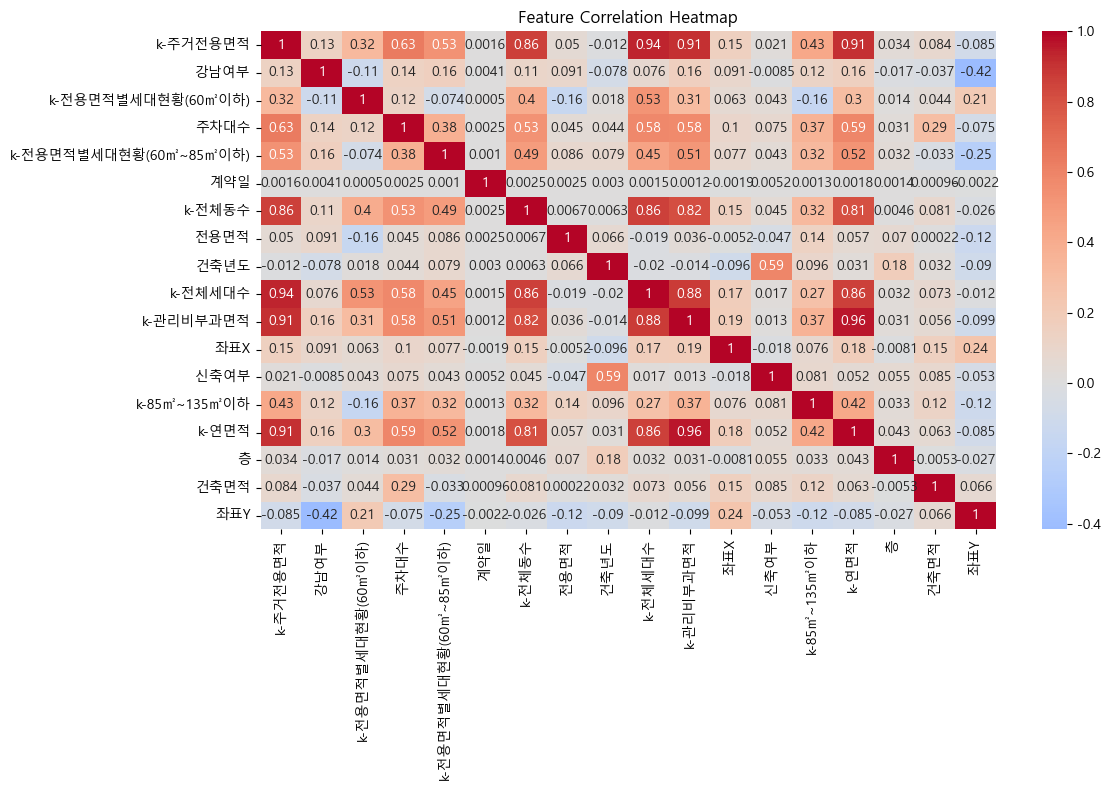


Calculating feature importance...


KeyError: "['target'] not found in axis"

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

class DataPreprocessor:
    def __init__(self, target_col):
        self.target_col = target_col
        self.scalers = {}
        self.feature_importance = {}
        self.correlation_groups = {}
        
    def analyze_distributions(self, df):
        """데이터 분포 분석 및 시각화"""
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        
        fig, axes = plt.subplots(2, 1, figsize=(15, 10))
        
        # 스케일링 전 분포
        sns.boxplot(data=df[numeric_cols], ax=axes[0])
        axes[0].set_title('Distribution Before Scaling')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Skewness 분석
        skewness = df[numeric_cols].skew().sort_values(ascending=False)
        print("\nSkewness Analysis:")
        print(skewness)
        
        return skewness
        
    def scale_features(self, df):
        """특성별 적절한 스케일링 적용"""
        scaled_df = df.copy()
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        
        for col in numeric_cols:
            if col == self.target_col:
                continue
                
            skewness = df[col].skew()
            
            # 좌표나 날짜 관련 컬럼은 RobustScaler 사용
            if '좌표' in col or '년도' in col or '날짜' in col:
                scaler = RobustScaler()
            # 심한 왜도는 PowerTransformer 사용
            elif abs(skewness) > 1:
                scaler = PowerTransformer(method='yeo-johnson')
            else:
                scaler = RobustScaler()
                
            scaled_df[col] = scaler.fit_transform(df[[col]])
            self.scalers[col] = scaler
            
        return scaled_df
        
    def analyze_correlations(self, df, threshold=0.7):
        """상관관계 분석 및 그룹화"""
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        corr_matrix = df[numeric_cols].corr()
        
        # 상관관계 히트맵 시각화
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlation Heatmap')
        plt.tight_layout()
        plt.show()
        
        # 높은 상관관계를 가진 피처 그룹화
        self.correlation_groups = {}
        processed_features = set()
        
        for i in range(len(numeric_cols)):
            feature1 = numeric_cols[i]
            if feature1 in processed_features:
                continue
                
            correlated_features = {feature1}
            for j in range(i + 1, len(numeric_cols)):
                feature2 = numeric_cols[j]
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    correlated_features.add(feature2)
                    
            if len(correlated_features) > 1:
                self.correlation_groups[feature1] = correlated_features
                processed_features.update(correlated_features)
                
        return self.correlation_groups
        
    def calculate_feature_importance(self, df):
        """특성 중요도 계산"""
        X = df.drop(columns=[self.target_col])
        y = df[self.target_col]
        
        importance_scores = mutual_info_regression(X, y)
        self.feature_importance = dict(zip(X.columns, importance_scores))
        
        # 중요도 시각화
        importance_df = pd.DataFrame(
            importance_scores,
            index=X.columns,
            columns=['importance']
        ).sort_values('importance', ascending=True)
        
        plt.figure(figsize=(10, 6))
        importance_df.plot(kind='barh')
        plt.title('Feature Importance Scores')
        plt.tight_layout()
        plt.show()
        
        return self.feature_importance
        
    def select_features(self, df, correlation_threshold=0.7, importance_threshold=0.01):
        """최종 특성 선택"""
        selected_features = set()
        
        # 상관관계 그룹에서 가장 중요한 특성 선택
        for group in self.correlation_groups.values():
            best_feature = max(group, key=lambda x: self.feature_importance.get(x, 0))
            selected_features.add(best_feature)
        
        # 상관관계가 낮은 중요 특성 추가
        uncorrelated_features = set(df.columns) - set.union(*self.correlation_groups.values())
        for feature in uncorrelated_features:
            if feature != self.target_col and self.feature_importance.get(feature, 0) > importance_threshold:
                selected_features.add(feature)
                
        return list(selected_features)

# 사용 예시
def preprocess_property_data(train_df, test_df, target_col='매매가격'):
    """부동산 데이터 전처리 파이프라인"""
    preprocessor = DataPreprocessor(target_col=target_col, categorical_cols: List[str] = None,
                 continuous_cols: List[str] = None,
                 exclude_cols: List[str] = None):)
    
    # 0. 공통 컬럼만 사용하도록 필터링
    common_columns = list(set(train_df.columns) & set(test_df.columns))
    train_df = train_df[common_columns]
    test_df = test_df[common_columns]
    
    # 1. 데이터 분포 분석
    print("Analyzing data distributions...")
    skewness = preprocessor.analyze_distributions(train_df)
    
    # 2. 스케일링 (train 데이터로 fit하고 test에 transform)
    print("\nApplying feature scaling...")
    scaled_train = preprocessor.scale_features(train_df)
    scaled_test = test_df.copy()
    for col, scaler in preprocessor.scalers.items():
        if col in test_df.columns and col != target_col:
            scaled_test[col] = scaler.transform(test_df[[col]])
    
    # 3. 상관관계 분석 (train 데이터로만)
    print("\nAnalyzing feature correlations...")
    correlation_groups = preprocessor.analyze_correlations(scaled_train)
    
    # 4. 특성 중요도 계산 (train 데이터로만)
    print("\nCalculating feature importance...")
    feature_importance = preprocessor.calculate_feature_importance(scaled_train)
    
    # 5. 최종 특성 선택 (train에서 선택한 특성을 test에도 동일하게 적용)
    print("\nSelecting final features...")
    selected_features = preprocessor.select_features(scaled_train)
    
    # 선택된 특성이 train과 test 모두에 있는지 확인
    selected_features = [f for f in selected_features if f in scaled_test.columns]
    print(f"Final selected features: {selected_features}")
    
    # 최종 데이터셋 생성
    X_train = scaled_train[selected_features]
    y_train = train_df[target_col]
    X_test = scaled_test[selected_features]
    
    # 컬럼 일치 확인
    assert set(X_train.columns) == set(X_test.columns), "Train과 Test의 컬럼이 일치하지 않습니다!"
    
    return X_train, y_train, X_test, preprocessor


train_data, test_data = DataPrep.unconcat_train_test(concat)

# y_train = train_data['target']
# X_train = train_data.drop('target', inplace=False)
# X_test = test_data

# 전처리 파이프라인 실행
X_train, y_train, X_test, preprocessor = preprocess_property_data(
    train_data,
    test_data,
    target_col='target'
)

# 결과 출력
print("\nFinal selected features:", len(X_train.columns))
print(X_train.columns.tolist())

# 상위 5개 중요 특성
top_features = sorted(
    preprocessor.feature_importance.items(),
    key=lambda x: x[1],
    reverse=True
)[:5]
print("\nTop 5 important features:")
for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")



In [20]:

X_train['target']=y_train
concat_scaled_selected_v2 = DataPrep.concat_train_test(X_train, X_test)

concat_scaled_selected_v2.to_csv(os.path.join(prep_path, 'df_concat_scaled_selected.csv'), index=False)

0    1118822
1       9272
Name: is_test, dtype: int64


In [21]:
test_data.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', '구', '동', '계약년', '계약월', '강남여부', '신축여부'],
      dtype='object')

In [61]:
train_df, test_df = DataPrep.unconcat_train_test(concat)

In [62]:
train_df.columns


Index(['본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부'],
      dtype='object')

In [63]:
test_df.columns


Index(['본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', '구', '동', '계약년', '계약월', '강남여부', '신축여부'],
      dtype='object')

In [64]:
X_train_scaled, y_train, X_test_scaled, selected_features, scaler_dict = preprocess_and_select(
    train_df=train_df,
    test_df=test_df,
    target_col='target'
)
X_train_scaled['target'] = y_train
concat = DataPrep.concat_train_test(X_train_scaled, X_test_scaled)


Combined data shape: (1128094, 47)
Numeric columns:32 
['본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명', 'k-전화번호', 'k-팩스번호', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '건축면적', '주차대수', '단지승인일', '좌표X', '좌표Y', '단지신청일', '구', '동', '계약년', '계약월']
Categorical columns:15 
['k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-홈페이지', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '사용허가여부', '관리비 업로드', '강남여부', '신축여부']
Calculating correlation with threshold: 0.9


100%|██████████| 47/47 [00:00<00:00, 1424.29it/s]


Found 16 groups of correlated features.
{'k-전화번호': {'k-단지분류(아파트,주상복합등등)', 'k-전화번호'}, 'k-팩스번호': {'k-팩스번호', 'k-전화번호'}, 'k-세대타입(분양형태)': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)'}, 'k-관리방식': {'k-세대타입(분양형태)', 'k-관리방식', 'k-단지분류(아파트,주상복합등등)'}, 'k-사용검사일-사용승인일': {'k-세대타입(분양형태)', 'k-관리방식', 'k-사용검사일-사용승인일', 'k-단지분류(아파트,주상복합등등)'}, 'k-주거전용면적': {'k-전체세대수', 'k-주거전용면적', 'k-연면적'}, 'k-관리비부과면적': {'k-주거전용면적', 'k-관리비부과면적', 'k-연면적'}, 'k-수정일자': {'k-세대타입(분양형태)', 'k-사용검사일-사용승인일', 'k-수정일자', 'k-단지분류(아파트,주상복합등등)'}, '경비비관리형태': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', '경비비관리형태', 'k-사용검사일-사용승인일', 'k-관리방식'}, '세대전기계약방법': {'세대전기계약방법', 'k-단지분류(아파트,주상복합등등)'}, '청소비관리형태': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', '경비비관리형태', 'k-사용검사일-사용승인일', 'k-관리방식', '청소비관리형태'}, '기타/의무/임대/임의=1/2/3/4': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', '경비비관리형태', '기타/의무/임대/임의=1/2/3/4', '세대전기계약방법', 'k-사용검사일-사용승인일', 'k-수정일자', 'k-전화번호', 'k-관리방식', '청소비관리형태'}, '단지승인일': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', '단지승인일', '경비비관리형태', '기타/의무/임대/임의=1/2/3/4', 'k-사용검사일-사용승인일',

100%|██████████| 16/16 [00:00<00:00, 16004.98it/s]


Found 28 uncorrelated features: {'동', 'k-복도유형', '부번', '주차대수', 'k-홈페이지', '구', '도로명', 'k-전체동수', '전용면적', '건축년도', '고용보험관리번호', 'k-시행사', 'k-전용면적별세대현황(60㎡이하)', '강남여부', '좌표Y', '계약일', 'k-전용면적별세대현황(60㎡~85㎡이하)', '좌표X', '본번', '층', 'k-85㎡~135㎡이하', '계약월', 'k-건설사(시공사)', '아파트명', '건축면적', 'k-난방방식', '신축여부', '계약년'}
'select_important_features' 함수 실행 시간: 1226.897969초
Selected features: 36
Train shape: (1118822, 36)
Test shape: (9272, 36)
'preprocess_and_select' 함수 실행 시간: 1344.220491초
0    1118822
1       9272
Name: is_test, dtype: int64


In [81]:
concat.to_csv(os.path.join(prep_path, 'concat_scaled_selected.csv'), index=False)


In [38]:
df1 = pd.read_csv(os.path.join(output_path, 'output_random_forest_baseline_hold_out_2.csv'))
df2 = pd.read_csv(os.path.join(output_path, 'output_random_forest_baseline_hold_out.csv'))


In [39]:
diff_sum = (df1 - df2).sum()
logger.info(f"차이 합계: {diff_sum}")  #    


2024-11-10 14:08:45,207 - root - INFO - 차이 합계: target    0
dtype: int64


In [28]:
df_base_done = pd.read_csv(os.path.join(prep_path, 'df_base_prep.csv'))

df_base_done.columns


Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-홈페이지', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', 'is_test'],
      dtype='object')

In [83]:

concat_scaled_selected.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부', 'is_test'],
      dtype='object')

In [65]:
concat.to_csv(os.path.join(prep_path, 'concat_scaled_selected.csv'), index=False)


In [70]:
import pickle
path_feat_pickle = os.path.join(prep_path, 'df_feat.pickle')
with open(path_feat_pickle, 'rb') as f:
    feat_eng_data = pickle.load(f)

In [74]:
dt_train = feat_eng_data.get('dt_train')
dt_test = feat_eng_data.get('dt_test')

print(dt_train.columns)
print(dt_test.columns)


concat = Utils.concat_train_test(dt_train, dt_test)
concat.to_csv(os.path.join(prep_path, 'concat_scaled_selected_re.csv'), index=False)


Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부'],
      dtype='object')
Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', 

AttributeError: type object 'Utils' has no attribute 'concat_train_test'

In [74]:
df = pd.read_csv(os.path.join(prep_path, 'df_base_done.csv'))
feat_transport = pd.read_csv(os.path.join(prep_path, 'feat_transport.csv'))
feat_cluster = pd.read_csv(os.path.join(prep_path, 'feat_cluster.csv'))

print(f'df.shape: {df.shape}, {df.columns}')
print(f'feat_transport.shape: {feat_transport.shape}, {feat_transport.columns}')
print(f'feat_cluster.shape: {feat_cluster.shape}, {feat_cluster.columns}')

df_concat = pd.concat([df, feat_transport, feat_cluster], axis=1)
print(df_concat.shape, df_concat.columns)

df_concat.to_csv(os.path.join(prep_path, 'df_base_concat_feat.csv'), index=False)


#cols_transport = feat_transport.columns
cols_cluster = feat_cluster.columns
cols_transport_categorical = ['subway_station_area_count', 'subway_direct_influence_count',
                              'subway_indirect_influence_count',
                              'subway_zone_type', 'bus_station_area_count',
                              'bus_direct_influence_count', 'bus_indirect_influence_count',
                              'bus_zone_type']
categorical_features =['전용면적', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', '강남여부', '신축여부']
numerical_features = ['번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일', '구', '동', '계약년', '계약월']

numerical_features = numerical_features + ['subway_shortest_distance','bus_shortest_distance']
categorical_features = categorical_features + list(cols_cluster) + cols_transport_categorical
print(f'{len(categorical_features)}')
print(f'numerical_features: {len(numerical_features)}, categorical_features: {len(categorical_features)}')


df.shape: (1128094, 50), Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부', 'is_test'],
      dtype='object')
feat_transport.shape: (1128094, 10), Index(['subway_station_area_count', 'subway_direct_influence_count',
       'subway_indirect_influence_count', 'subway_shortest_distance',
       'subway_zone_type', 'bus_station_area_count',
       'bus_direct_influence_count', 'bus_indirect_influence_count',
       'bus_shortest_distance', 'bus_zone_type'],
      dtype='object')

## 2nd Prep

In [4]:
from src.utils import Utils
from typing import List, Dict
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from tqdm import tqdm

class DataScaler:
    def __init__(self, 
                 target_col: str,
                 categorical_cols: List[str] = None,
                 continuous_cols: List[str] = None,
                 exclude_cols: List[str] = None):
        self.target_col = target_col
        self.categorical_cols = set(categorical_cols) if categorical_cols else set()
        self.continuous_cols = set(continuous_cols) if continuous_cols else set()
        self.exclude_cols = set(exclude_cols) if exclude_cols else set()
        self.scalers = {}
        
    def _get_appropriate_scaler(self, col_name: str, data: pd.Series) -> object:
        """컬럼 특성에 맞는 스케일러 반환"""
        if col_name in self.categorical_cols:
            return StandardScaler()
            
        if abs(data.skew()) > 1:
            return Pipeline([
                ('robust', RobustScaler()),
                ('power', PowerTransformer(method='yeo-johnson'))
            ])
        
        return RobustScaler()

    def scale_features(self, df: pd.DataFrame, is_train: bool = True) -> pd.DataFrame:
        """특성별 적절한 스케일링 적용"""
        scaled_df = df.copy()

        # 스케일링할 컬럼 결정
        if self.continuous_cols:
            scale_cols = self.continuous_cols | self.categorical_cols
        else:
            scale_cols = set(df.select_dtypes(include=['int64', 'float64']).columns)
        
        # 제외할 컬럼 제거
        scale_cols = scale_cols - self.exclude_cols - {self.target_col, 'is_test'}
        
        # 누락된 컬럼 확인
        missing_cols = scale_cols - set(df.columns)
        if missing_cols:
            print(f"Warning: 다음 컬럼들이 데이터에 없습니다: {missing_cols}")
        
        # 실제 스케일링할 컬럼
        actual_scale_cols = scale_cols & set(df.columns)
        print(f"스케일링 적용 컬럼: {sorted(actual_scale_cols)}")
        
        for col in tqdm(actual_scale_cols):
            if is_train:
                scaler = self._get_appropriate_scaler(col, df[col])
                self.scalers[col] = scaler
                scaled_values = scaler.fit_transform(df[[col]]).ravel()  # 1D로 변환
                scaled_df[col] = scaled_values
            else:
                if col in self.scalers:
                    scaled_values = self.scalers[col].transform(df[[col]]).ravel()  # 1D로 변환
                    scaled_df[col] = scaled_values
                
        return scaled_df


In [25]:

#prep_path = os.path.join(base_path, 'data', 'preprocessed') # base_path 는 프로젝트 루트 경로 등
df_feat = pd.read_csv(os.path.join(prep_path, 'df_interpolation.csv'), index_col=0) # train, test data 가 합쳐진 데이터 불러오기; is_test =0, 1 로 구분

####



In [38]:
column_types =Utils.detect_column_types(df_feat, unique_ratio_threshold=1e-7, exclude_cols=['is_test', 'target'])
# 0.0000001 일때 is_numeric_dtype 과 비슷한 결과 나옴.
categorical_features = column_types['categorical']
numerical_features = column_types['numerical']   

Categorical columns (21): ['k-건설사(시공사)', 'k-관리방식', 'k-난방방식', 'k-단지분류(아파트,주상복합등등)', 'k-복도유형', 'k-사용검사일-사용승인일', 'k-세대타입(분양형태)', 'k-수정일자', 'k-시행사', '경비비관리형태', '관리비 업로드', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '단지신청일', '도로명', '번지', '사용허가여부', '세대전기계약방법', '시군구', '아파트명', '청소비관리형태']
Numerical columns (19): ['k-85㎡~135㎡이하', 'k-관리비부과면적', 'k-연면적', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-전용면적별세대현황(60㎡이하)', 'k-전체동수', 'k-전체세대수', 'k-주거전용면적', '건축년도', '건축면적', '계약년월', '계약일', '본번', '부번', '전용면적', '좌표X', '좌표Y', '주차대수', '층']


In [27]:
concat_select = df_raw
continuous_columns = []
categorical_columns = []
for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print(f'categorical_columns: {len(categorical_columns)} {categorical_columns}')
print(f'continuous_columns: {len(continuous_columns)} {continuous_columns}')



categorical_columns: 0 []
continuous_columns: 45 ['본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '구', '동', '계약년', '계약월', '강남여부', '신축여부', 'is_test']


In [39]:
df_train, df_test = Utils.unconcat_train_test(df_feat) # train, test data 분리

# # categorical, numerical 기준은 baseline 으로 임시 작성. 변경 가능.
# categorical_features =['전용면적', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', '강남여부', '신축여부']
# numerical_features = ['번지', '본번', '부번', '아파트명', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일', '구', '동', '계약년', '계약월']
# add_features = ['구', '동', '계약년', '계약월']
# numerical_features = list(set(numerical_features)-set(add_features))


data_scaler = DataScaler(target_col='target',
                            categorical_cols=categorical_features,
                            continuous_cols=numerical_features,
                            exclude_cols=['is_test']  ) # 아직 

# 1. Numerical Features 들의 경우, outlier removal 없이 이상치에 강건하게 Robust Scaling 을 먼저 적용합니다.
# 학습 데이터 전처리
train_scaled = data_scaler.scale_features(df_train[numerical_features], is_train=True)
# 테스트 데이터 전처리 (학습 데이터의 스케일러 사용)
test_scaled = data_scaler.scale_features(df_test[numerical_features], is_train=False)
concat_scaled = Utils.concat_train_test(train_scaled, test_scaled)
concat_scaled.to_csv(os.path.join(prep_path, 'concat_scaled.csv'), index=False)

# 2. Categorical Features 들의 경우, Feature engineering 후 encoding 까지 완료된 이후에 표준화 스케일링을 별도 적용합니다



스케일링 적용 컬럼: ['k-85㎡~135㎡이하', 'k-관리비부과면적', 'k-연면적', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-전용면적별세대현황(60㎡이하)', 'k-전체동수', 'k-전체세대수', 'k-주거전용면적', '건축년도', '건축면적', '계약년월', '계약일', '본번', '부번', '전용면적', '좌표X', '좌표Y', '주차대수', '층']


100%|██████████| 19/19 [00:34<00:00,  1.80s/it]


스케일링 적용 컬럼: ['k-85㎡~135㎡이하', 'k-관리비부과면적', 'k-연면적', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-전용면적별세대현황(60㎡이하)', 'k-전체동수', 'k-전체세대수', 'k-주거전용면적', '건축년도', '건축면적', '계약년월', '계약일', '본번', '부번', '전용면적', '좌표X', '좌표Y', '주차대수', '층']


100%|██████████| 19/19 [00:00<00:00, 152.00it/s]


0    1118822
1       9272
Name: is_test, dtype: int64


In [74]:
list(set(numerical_features)-set(add_features))


['기타/의무/임대/임의=1/2/3/4',
 '청소비관리형태',
 '본번',
 '관리비 업로드',
 'k-사용검사일-사용승인일',
 '단지승인일',
 'k-시행사',
 'k-난방방식',
 'k-수정일자',
 '세대전기계약방법',
 'k-관리방식',
 'k-팩스번호',
 'k-단지분류(아파트,주상복합등등)',
 'k-전화번호',
 'k-복도유형',
 '고용보험관리번호',
 '부번',
 '경비비관리형태',
 '사용허가여부',
 '단지신청일',
 '도로명',
 '번지',
 '아파트명',
 'k-세대타입(분양형태)',
 'k-건설사(시공사)']

In [54]:

# 학습 데이터 전처리
train_scaled = preprocessor.scale_features(train_df, is_train=True)

# 테스트 데이터 전처리 (학습 데이터의 스케일러 사용)
test_scaled = preprocessor.scale_features(test_df, is_train=False)


스케일링 적용 컬럼: ['k-건설사(시공사)', 'k-관리방식', 'k-난방방식', 'k-단지분류(아파트,주상복합등등)', 'k-복도유형', 'k-사용검사일-사용승인일', 'k-세대타입(분양형태)', 'k-수정일자', 'k-시행사', 'k-전화번호', 'k-팩스번호', '경비비관리형태', '고용보험관리번호', '관리비 업로드', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '단지신청일', '도로명', '번지', '본번', '부번', '사용허가여부', '세대전기계약방법', '아파트명', '청소비관리형태']


TypeError: could not convert string to float: '임의'

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', 'is_test'],
      dtype='object')
(1128094, 53)


In [ ]:
from sklearn.feature_selection import mutual_info_regression

class FeatureSelector:
    def __init__(self, 
                 target_col: str,
                 categorical_cols: List[str] = None,
                 continuous_cols: List[str] = None,
                 exclude_cols: List[str] = None):
        self.target_col = target_col
        self.categorical_cols = set(categorical_cols) if categorical_cols else set()
        self.continuous_cols = set(continuous_cols) if continuous_cols else set()
        self.exclude_cols = set(exclude_cols) if exclude_cols else set()
        self.scalers = {}

        self.feature_importance = {}
        self.correlation_groups = {}
        
    
    def analyze_correlations(self, df: pd.DataFrame, threshold: float = 0.7) -> Dict:
        """상관관계 분석 및 그룹화"""
        # 스케일링된 컬럼만 사용
        analysis_cols = set(self.scalers.keys())
        
        if len(analysis_cols) > 0:
            corr_matrix = df[list(analysis_cols)].corr()
            
            # 메모리 효율을 위해 큰 데이터셋의 경우 시각화 건너뛰기
            if len(df) < 100000:  # 10만 행 미만일 때만 시각화
                plt.figure(figsize=(12, 8))
                sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
                plt.title('Feature Correlation Heatmap')
                plt.tight_layout()
                plt.show()
            
            # 높은 상관관계를 가진 피처 그룹화
            self.correlation_groups = {}
            processed_features = set()
            
            for i, feature1 in enumerate(analysis_cols):
                if feature1 in processed_features:
                    continue
                    
                correlated_features = {feature1}
                for j, feature2 in enumerate(analysis_cols):
                    if i != j and abs(corr_matrix.loc[feature1, feature2]) > threshold:
                        correlated_features.add(feature2)
                        
                if len(correlated_features) > 1:
                    self.correlation_groups[feature1] = correlated_features
                    processed_features.update(correlated_features)
            
            # 상관관계 그룹 출력
            if self.correlation_groups:
                print("\n높은 상관관계(>{threshold})를 가진 특성 그룹:")
                for key, group in self.correlation_groups.items():
                    print(f"- {key}: {sorted(group)}")
                    
        return self.correlation_groups
    def calculate_feature_importance(self, df: pd.DataFrame, sample_size: int = None) -> Dict:
        """특성 중요도 계산"""
        # 스케일링된 컬럼만 사용
        feature_cols = list(self.scalers.keys())
        
        if not feature_cols:
            print("Warning: 스케일링된 특성이 없습니다!")
            return {}
            
        X = df[feature_cols]
        y = df[self.target_col]
        
        # 대용량 데이터의 경우 샘플링
        if sample_size and len(df) > sample_size:
            print(f"\n{sample_size}개 샘플로 특성 중요도 계산")
            idx = np.random.choice(len(df), sample_size, replace=False)
            X = X.iloc[idx]
            y = y.iloc[idx]
        
        # 특성 중요도 계산
        importance_scores = mutual_info_regression(X, y)
        self.feature_importance = dict(zip(feature_cols, importance_scores))
        
        # 중요도 순으로 정렬
        sorted_importance = sorted(
            self.feature_importance.items(), 
            key=lambda x: x[1], 
            reverse=True
        )
        
        # 결과 출력
        print("\n특성 중요도 (상위 10개):")
        for feature, importance in sorted_importance[:10]:
            print(f"- {feature}: {importance:.4f}")
        
        # 시각화 (샘플링된 경우에만)
        if sample_size and len(df) > sample_size:
            plt.figure(figsize=(12, 6))
            importance_df = pd.DataFrame(
                sorted_importance,
                columns=['feature', 'importance']
            ).set_index('feature')
            
            importance_df.plot(kind='bar')
            plt.title('Feature Importance Scores')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        
        return self.feature_importance
    def select_features(self, df: pd.DataFrame, 
                   correlation_threshold: float = 0.8,
                   importance_threshold: float = 0.01) -> List[str]:
        """
        최종 특성 선택
        Args:
            df: 데이터프레임
            correlation_threshold: 상관관계 임계값 (이 값 이상이면 높은 상관관계로 판단)
            importance_threshold: 중요도 임계값 (이 값 이상이면 중요한 특성으로 판단)
        """
        selected_features = set()
        
        # 상관관계 다시 계산 (임계값 적용)
        self.analyze_correlations(df, threshold=correlation_threshold)
        
        # 1. 상관관계 그룹에서 가장 중요한 특성 선택
        for group in self.correlation_groups.values():
            best_feature = max(group, key=lambda x: self.feature_importance.get(x, 0))
            selected_features.add(best_feature)
        
        # 2. 상관관계가 낮은 중요 특성 추가
        correlated_features = set().union(*self.correlation_groups.values()) if self.correlation_groups else set()
        uncorrelated_features = set(self.scalers.keys()) - correlated_features
        
        for feature in uncorrelated_features:
            if self.feature_importance.get(feature, 0) > importance_threshold:
                selected_features.add(feature)
        
        # 3. 선택 결과 출력
        print(f"\n[특성 선택 결과]")
        print(f"상관관계 임계값: {correlation_threshold}")
        print(f"중요도 임계값: {importance_threshold}")
        print(f"\n선택된 특성 ({len(selected_features)}개):")
        print(sorted(selected_features))
        
        excluded_features = set(self.scalers.keys()) - selected_features
        print(f"\n제외된 특성 ({len(excluded_features)}개):")
        print(sorted(excluded_features))
        
        # 4. 선택된 특성들의 중요도 출력
        if self.feature_importance:
            print("\n선택된 특성들의 중요도:")
            for feature in sorted(selected_features):
                importance = self.feature_importance.get(feature, 0)
                print(f"- {feature}: {importance:.4f}")
        
        return list(selected_features)

In [70]:
print(f'Data shape: {df_concat.shape}\nnumerical_features: {len(numerical_features)}\ncategorical_features: {len(categorical_features)}')





Data shape: (1128094, 64)
numerical_features: 31
categorical_features: 31


In [21]:
df_concat

NameError: name 'df_concat' is not defined

In [86]:
test=df_concat.drop(columns=numerical_features + categorical_features, inplace=False)
test.columns


Index(['k-홈페이지', 'is_test'], dtype='object')

In [20]:
X_train, y_train, X_test, preprocessor = preprocess_property_data(
    concat_df=df_concat,
    target_col='target',
    categorical_cols=categorical_features,
    continuous_cols=numerical_features,
    exclude_cols=['is_test'],
    sample_size=100000
)

NameError: name 'preprocess_property_data' is not defined

In [88]:
1029574+9272

1038846

In [83]:
df_concat.to_csv(os.path.join(prep_path, 'df_baseline.csv'), index=False)


In [79]:
X_train['target'] = y_train

concat_scaled_selected = DataPrep.concat_train_test(X_train, X_test)
concat_scaled_selected.to_csv(os.path.join(prep_path, 'df_feat_scaled_selected.csv'), index=False)


0    1118822
1       9272
Name: is_test, dtype: int64


In [19]:
df_profile = pd.read_csv(os.path.join(prep_path, 'df_profile.csv'))
print(df_profile)


                Unnamed: 0     type  missing_count  missing_ratio  \
0                      시군구   object              0       0.000000   
1                       번지   object            227       0.021851   
2                       본번  float64             75       0.007220   
3                       부번  float64             75       0.007220   
4                     아파트명   object           1923       0.185109   
5                     전용면적  float64              0       0.000000   
6                     계약년월    int64              0       0.000000   
7                      계약일    int64              0       0.000000   
8                        층    int64              0       0.000000   
9                     건축년도    int64              0       0.000000   
10                     도로명   object              0       0.000000   
11      k-단지분류(아파트,주상복합등등)   object         805798      77.566646   
12                  k-전화번호   object         805544      77.542196   
13                  k-팩스번호   objec

In [24]:
X_train['target'] = y_train
concat = DataPrep.concat_train_test(X_train, X_test)
concat.to_csv(os.path.join(prep_path, 'concat_scaled_selected_re.csv'), index=False)

0    1118822
1       9272
Name: is_test, dtype: int64


In [81]:
concat.columns

Index(['구', '부번', 'k-홈페이지', '세대전기계약방법', '단지신청일', '사용허가여부', '청소비관리형태', '강남여부',
       'k-전용면적별세대현황(60㎡이하)', '도로명', '경비비관리형태', '주차대수', 'k-시행사',
       'k-전용면적별세대현황(60㎡~85㎡이하)', '단지승인일', 'k-사용검사일-사용승인일', 'k-세대타입(분양형태)',
       'k-수정일자', '관리비 업로드', 'k-건설사(시공사)', '전용면적', '기타/의무/임대/임의=1/2/3/4', '동',
       '건축년도', '아파트명', '계약년', 'k-관리방식', '고용보험관리번호', 'k-팩스번호', 'k-관리비부과면적',
       '좌표X', '신축여부', '본번', 'k-85㎡~135㎡이하', 'k-복도유형', 'k-난방방식', '층', 'k-전화번호',
       '번지', '건축면적', 'k-단지분류(아파트,주상복합등등)', '좌표Y', '계약월', 'target', 'is_test'],
      dtype='object')

In [26]:
concat.shape


(1128094, 45)

In [ ]:
concat.to_csv(os.path.join(prep_path, 'concat_feat_scaled_selected.csv'), index=False)

In [31]:
df=concat
df_id = df[col_id]
df = df.drop(columns=col_id, inplace=False)
scaled_df, selected_df, selected_features = preprocess_and_select(df)

Scaling numeric features


100%|██████████| 48/48 [01:28<00:00,  1.84s/it]


'scale_numeric_features' 함수 실행 시간: 88.672610초
Calculating correlation with threshold: 0.9


100%|██████████| 48/48 [00:00<00:00, 1297.31it/s]


Found 18 groups of correlated features.
{'k-전화번호': {'k-단지분류(아파트,주상복합등등)', 'k-전화번호'}, 'k-팩스번호': {'k-팩스번호', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호'}, 'k-세대타입(분양형태)': {'k-세대타입(분양형태)', 'k-팩스번호', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호'}, 'k-관리방식': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-관리방식', 'k-팩스번호'}, 'k-복도유형': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', 'k-복도유형', 'k-전화번호', 'k-관리방식', 'k-팩스번호'}, 'k-난방방식': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', 'k-복도유형', 'k-난방방식', 'k-전화번호', 'k-관리방식', 'k-팩스번호'}, 'k-사용검사일-사용승인일': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', 'k-복도유형', 'k-난방방식', 'k-사용검사일-사용승인일', 'k-관리방식'}, 'k-주거전용면적': {'k-전체세대수', 'k-주거전용면적', 'k-연면적'}, 'k-관리비부과면적': {'k-주거전용면적', 'k-관리비부과면적', 'k-연면적'}, 'k-수정일자': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', 'k-복도유형', 'k-난방방식', 'k-사용검사일-사용승인일', 'k-수정일자', 'k-관리방식'}, '경비비관리형태': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', 'k-복도유형', '경비비관리형태', 'k-난방방식', 'k-사용검사일-사용승인일', 'k-수정일자', 'k-전화번호', 'k-관리방식', 'k-팩스번호'}, '세대전기계약방법': {'k-세대타입(분양형태)', 'k-단지분류(아파트,주상복합등등)', 'k-복도유형', '경비비관리형태'

100%|██████████| 18/18 [00:00<?, ?it/s]

Found 27 uncorrelated features: {'동', '부번', '주차대수', 'k-홈페이지', '구', '도로명', 'k-전체동수', '전용면적', '건축년도', '번지', '고용보험관리번호', 'k-시행사', 'k-전용면적별세대현황(60㎡이하)', '강남여부', '좌표Y', '계약일', 'k-전용면적별세대현황(60㎡~85㎡이하)', '좌표X', '본번', '층', 'k-85㎡~135㎡이하', '계약월', 'k-건설사(시공사)', '아파트명', '건축면적', '신축여부', '계약년'}
'select_important_features' 함수 실행 시간: 727.605931초
Selected 32 features: ['동', '부번', 'k-연면적', '주차대수', 'k-홈페이지', '구', '도로명', 'k-전체동수', 'k-사용검사일-사용승인일', '전용면적', '건축년도', '번지', '고용보험관리번호', 'k-시행사', 'k-전용면적별세대현황(60㎡이하)', '강남여부', '좌표Y', '계약일', 'k-수정일자', 'k-전용면적별세대현황(60㎡~85㎡이하)', '좌표X', '본번', '층', 'k-85㎡~135㎡이하', '계약월', 'k-건설사(시공사)', 'k-관리비부과면적', '아파트명', '건축면적', '신축여부', '계약년', 'k-전화번호']
'preprocess_and_select' 함수 실행 시간: 824.097681초


In [34]:
selected_df.columns


Index(['is_test', 'target', '동', '부번', 'k-연면적', '주차대수', 'k-홈페이지', '구', '도로명',
       'k-전체동수', 'k-사용검사일-사용승인일', '전용면적', '건축년도', '번지', '고용보험관리번호', 'k-시행사',
       'k-전용면적별세대현황(60㎡이하)', '강남여부', '좌표Y', '계약일', 'k-수정일자',
       'k-전용면적별세대현황(60㎡~85㎡이하)', '좌표X', '본번', '층', 'k-85㎡~135㎡이하', '계약월',
       'k-건설사(시공사)', 'k-관리비부과면적', '아파트명', '건축면적', '신축여부', '계약년', 'k-전화번호'],
      dtype='object')

In [33]:
scaled_df = pd.concat([df_id, scaled_df], axis=1)
scaled_df.to_csv(os.path.join(prep_path, 'df_base_scaled.csv'), index=False)

selected_df = pd.concat([df_id, selected_df], axis=1)
selected_df.to_csv(os.path.join(prep_path, 'df_base_selected.csv'), index=False)



In [ ]:
selected_df.columns
selected_df.head()
selected_df.shape
selected_df.info()
selected_df.describe()

In [101]:
def clean_df(df):
    df = utils.remove_unnamed_columns(df)

    duplicated_cols = df.columns[df.columns.duplicated()].tolist()
    print("중복된 컬럼:", duplicated_cols)

    # 방법 1: 중복 컬럼 제거 (첫 번째 컬럼 유지)
    df = df.loc[:, ~df.columns.duplicated(keep='first')]
    df.drop(columns=['target'], inplace=True)
    return df

cleaned_df = clean_df(scaled_df)
cleaned_df.columns

2024-11-09 08:12:03,512 - root - INFO - Removing unnamed columns: ['Unnamed: 0']
중복된 컬럼: ['target']


Index(['is_test', '번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사',
       'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', '구', '동', '계약년', '계약월', '강남여부', '신축여부',
       'subway_station_area_count', 'subway_direct_influence_count',
       'subway_indirect_influence_count', 'subway_shortest_distance',
       'subway_zone_type', 'bus_station_area_count',
       'bus_direct_influence_count', 'bus_indirect_influence_count',
       'bus_shortest_distance', 'bus_zone_type', 'cluster_dist_transport',
       'cluster_dist_transport_count'],
      dtype='object')

In [102]:
procseed_df = clean_df(processed_df)
procseed_df.columns


2024-11-09 08:12:28,007 - root - INFO - Removing unnamed columns: ['Unnamed: 0']
중복된 컬럼: ['target']


Index(['is_test', '본번', 'k-전용면적별세대현황(60㎡이하)', 'cluster_dist_transport_count',
       'cluster_dist_transport', 'bus_direct_influence_count', '강남여부',
       'bus_station_area_count', 'k-관리비부과면적', '건축면적', 'k-전화번호', 'k-전체동수', '번지',
       '계약월', 'subway_zone_type', '신축여부', '고용보험관리번호', '전용면적',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'bus_zone_type', 'k-사용검사일-사용승인일',
       'subway_direct_influence_count', 'k-홈페이지', '부번', '층', '아파트명',
       'subway_station_area_count', 'bus_shortest_distance',
       'subway_shortest_distance', '도로명', 'k-85㎡~135㎡이하', 'k-연면적', '구', '계약일',
       '좌표Y', 'k-시행사', '건축년도', 'k-건설사(시공사)', '계약년',
       'subway_indirect_influence_count', '주차대수', '동', '좌표X', 'k-수정일자',
       'bus_indirect_influence_count'],
      dtype='object')

In [106]:
cleaned_df.to_csv(os.path.join(prep_path, 'df_baseline_scaled.csv'), index=False)

In [107]:
processed_df.to_csv(os.path.join(prep_path, 'df_baseline_preprocessed.csv'), index=False)

In [100]:
processed_df['is_test']

0          0
1          0
2          0
3          0
4          0
          ..
1128089    1
1128090    1
1128091    1
1128092    1
1128093    1
Name: is_test, Length: 1128094, dtype: int64

In [95]:
len(cleaned_df.columns)

62

In [93]:
df_id.columns
scaled_df.columns[]

Index(['is_test', 'target', 'target', 'Unnamed: 0', '번지', '본번', '부번', '아파트명',
       '전용면적', '계약일', '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호',
       'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수',
       'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적',
       'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', 'k-홈페이지', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법',
       '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부',
       '관리비 업로드', '좌표X', '좌표Y', '단지신청일', '구', '동', '계약년', '계약월', '강남여부',
       '신축여부', 'subway_station_area_count', 'subway_direct_influence_count',
       'subway_indirect_influence_count', 'subway_shortest_distance',
       'subway_zone_type', 'bus_station_area_count',
       'bus_direct_influence_count', 'bus_indirect_influence_count',
       'bus_shortest_distance', 'bus_zone_type', 'cluster_dist_transport',
       'cluster_dist_transport_count'],
      dtype='obje

In [92]:
scaled_df[['target']]

,target,target
0,124000.0,124000.0
1,123500.0,123500.0
2,91500.0,91500.0
3,130000.0,130000.0
4,117000.0,117000.0
...,...,...
1128089,0.0,0.0
1128090,0.0,0.0
1128091,0.0,0.0
1128092,0.0,0.0


In [88]:
processed_df.shape

(1128094, 48)

In [89]:
processed_df.columns

Index(['is_test', 'target', 'target', '본번', 'k-전용면적별세대현황(60㎡이하)',
       'cluster_dist_transport_count', 'cluster_dist_transport',
       'bus_direct_influence_count', '강남여부', 'bus_station_area_count',
       'k-관리비부과면적', '건축면적', 'Unnamed: 0', 'k-전화번호', 'k-전체동수', '번지', '계약월',
       'subway_zone_type', '신축여부', '고용보험관리번호', '전용면적',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'bus_zone_type', 'k-사용검사일-사용승인일',
       'subway_direct_influence_count', 'k-홈페이지', '부번', '층', '아파트명',
       'subway_station_area_count', 'bus_shortest_distance',
       'subway_shortest_distance', '도로명', 'k-85㎡~135㎡이하', 'k-연면적', '구', '계약일',
       '좌표Y', 'k-시행사', '건축년도', 'k-건설사(시공사)', '계약년',
       'subway_indirect_influence_count', '주차대수', '동', '좌표X', 'k-수정일자',
       'bus_indirect_influence_count'],
      dtype='object')

In [52]:
df.shape

(1128094, 61)

In [49]:
print(1)

1


# Pandas AI


In [ ]:
smart_df = SmartDataframe(df)
smart_df.chat('Which column features are critical to predict house price? Convert putative numeric values as float or integer.')


In [ ]:
smart_df.chat('Do Basic EDA and explain it.')

#
# 시군구	번지	본번	부번	아파트명	전용면적(㎡)	계약년월	계약일	층	건축년도	도로명	해제사유발생일	등기신청일자	거래유형	중개사소재지	k-단지분류(아파트,주상복합등등)
# 0	서울특별시 종로구 옥인동		4933.0	307.0	DMC래미안클라시스	71.84	202004	23	40	1998	마들로 646	20200917.0	20230914	중개거래	서울 강북구, 서울 성동구	도시형 생활주택(아파트)
# 1	서울특별시 성북구 성북동	44-8	NaN	NaN	래미안하이리버	15.94	201709	8	20	2022	남부순환로248길 78	NaN	20230915	직거래	서울 광진구, 서울 송파구	None
# 2	서울특별시 용산구 효창동	1312	1293.0	2000.0	None	112.23	201702	4	8	1978	이촌로54길 5	20230325.0	20230413	-	경기 김포시, 서울 강서구	연립주택

In [ ]:
smart_df.chat('Classify Two groups: Categorical or Numeric. Print total number of each group, and each columns. plot basic EDA stuff, based on the sorting (feature importance). Including correlation, heatmap.')

In [ ]:
smart_df.chat('Select important features, and suggest proper scaling method for each different features, for house price (numerica) prediction problem.')

In [ ]:
smart_df.chat('Select important features and tell me why, for house price (numerica) prediction problem.')

In [ ]:
smart_df.chat('Plot distribution and scatter plot altogher. if possible, 3D plot.')

In [ ]:
smart_df.chat('Plot distribution and scatter plot altogher. if possible, 3D plot.')

In [ ]:
smart_df.chat('Plot 3 most import figures.')

In [ ]:
smart_df.chat('What kind of scaling is needed for important features, each?')

In [ ]:
agent = Agent(df)
agent.chat('')



In [ ]:
agent.chat('Plot the histogram')


In [ ]:

from main_baseline import DataPrep, EDA, FeatureEngineer, Model
# import pygwalker as pyg


data_prep = DataPrep(config)
feat_eng = FeatureEngineer(config)
model_instance = Model(config)
df = data_prep.load_data(base_path)



In [ ]:
df = data_prep.prep_null(df)
df = data_prep.prep_inter(df)
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
cols = ['계약년', '전용면적', '강남여부', '구', '건축년도', '좌표X', '좌표Y', '동']
df = data_prep.remove_outliers_iqr(df, '전용면적')
# 이상치 제거 후의 shape은 아래와 같습니다. 약 10만개의 데이터가 제거된 모습을 확인할 수 있습니다.
print(df.shape)
df['is_test'].value_counts()     # 또한, train data만 제거되었습니다.

In [ ]:

walker = pyg.walk(
    df,
    spec="./chart_meta_0.json",    # this json file will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
    kernel_computation=True,          # set `kernel_computation=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
)

In [ ]:

#### Feat eng
df = feat_eng.prep_feat(df)
df_coor = {'x': '좌표X', 'y': '좌표Y'}
df_subway = data_prep.load_feat_data(os.path.join(base_path, 'data','subway_feature.csv'))
df_bus = data_prep.load_feat_data(os.path.joing(base_path, 'data','bus_feature.csv'))
subway_coor = {'x': '위도', 'y': '경도'}
bus_coor = {'x': 'X좌표', 'y': 'Y좌표'}

df = feat_eng.sum_distances_from_a_to_b(df, df_coor , df_subway, subway_coor, 'subway')
df = feat_eng.sum_distances_from_a_to_b(df, df_coor , df_bus, bus_coor, 'bus')
### split
dt_train, dt_test, continuous_columns_v2, categorical_columns_v2 = feat_eng.split_train_test(df)
dt_train, label_encoders = feat_eng.encode_label(dt_train, dt_test, continuous_columns_v2, categorical_columns_v2)
X_train, X_val, y_train, y_val = feat_eng.split_dataset(dt_train)

prep_data = {'X_train': X_train,
            'X_val': X_val,
            'y_train': y_train,
            'y_val': y_val,
            'continuous_columns': continuous_columns_v2,
            'categorical_columns': categorical_columns_v2
}
out_path_data = model_instance.save_data(prep_data)
# loaded_data = load_data_pkl(out_path_data)
# print(loaded_data)
model, pred = model_instance.model_train(X_train, X_val, y_train, y_val)
feat_eng.select_var(model, X_val, y_val, pred, label_encoders, categorical_columns_v2)
model_instance.inference(dt_test)